# Glass Indentification
Analisis dan Klasifikasi pada Dataset Kaca Untuk Menentukan Tipe Kaca

## Bussines Understanding
Dataset ini bersisi tentang data- data spesifikasi presentase kandungan senyawa kimia penyusun sebuah kaca untuk kemudian dikategorikan dalam jenis kaca tertentu.  Kajian klasifikasi jenis kaca dilatarbelakangi oleh penyelidikan kriminologi. Di TKP, kaca yang tersisa dapat digunakan sebagai barang bukti, jika diidentifikasi dengan benar



## Data Understanding
data understanding meliputi :
<ul>
    <li>Mendeskripsikan tiap fitur pada data berupa tipe data, dan deskripsi data</li>
    <li>Mengidentifikasi missing values</li>    
    <li>Eksplorasi data untuk mendapatkan detail tiap vitur</li>    
    <li>Identifikasi outlayer atau tidak</li>
    <li>Identifikasi jumlah data(proporsi data per class) untuk mengetahui keseimbangan data</li>
</ul>

Sebelum itu, kita akan me- load dataset terlebih dahulu. Kita akan menggunakan library pandas untuk membantu menampilkan dataset

In [1]:
import pandas as pd
df = pd.read_csv('glass_dataset.csv')
df.head(8)

,RI,na2o,mg,al2o3,sio2,k2o,cao,bao,fe2o3,label
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1


### Deskripsi Data
Dataset glass classification didapat dari laman UC Irvine Machine Learning repository. Link dapat diakses
[disini](https://archive.ics.uci.edu/dataset/42/glass+identification).

Dataset ini diambil pada hari Minggu, 29 Oktober 2023. Dataset ini memiliki kelebihan, yaitu memiliki tipe data yang sama dalam setiap fitur nya, sehingga lebih mudah untuk diolah.

Pada data tersebut terlihat memiliki 9 fitur 

**Tipe Data**

Dalam dataset ini, terdapat dua tipe data, yaitu numerik dan multivariate
fitur.
1. RI : Numerik
2. NA2O : Numerik
3. MGO : Numerik
4. AL2O3 : Numerik
5. SIO2 : Numerik
6. K2O : Numerik
7. CAO : Numerik
8. BAO : Numerik
9. FE2O3 : Numerik
10. label : Polytomous

    - Tipe data Numerik merupakan sekumpulan data yang tergambar dalam bentuk angka, bukan kata-kata. Data numerik dapat disebut juga data kuantitatif.
    - Tipe data Polytomous mengacu pada jenis data kategorikal yang memiliki lebih dari dua kategori.

**Deskripsi Fitur**

Setiap fitur menjelaskan presentase kandungan senyawa kimia yang menyusun kaca:

1. RI<br>Refractive Index, atau indeks bias, merupakan ukuran sejauh mana cahaya dapat merambat. Indeks refraksi didefinisikan sebagai rasio kecepatan cahaya dalam vakum. memiliki persamaan
   $$
    \text n = c/v
    $$
dimana :
- n = indeks bias medium
- c = cepat rambat cahaya di ruang hampa
- v = cepat rambat cahaya di medium

2. NA2O<br>Senyawa kimia natrium oksida
3. MGO<br>Senyawa kimia magnesium oksida
4. AL2<br>Senyawa kimia aluminium oksida
5. SIO2<br>Silikon Oksida
6. K2O<br>Potasium Oksida
7. CAO<br>Kalsium Oksida
8. BAO<br>Barium Oksida
9. FE203<br>Besi(III) Oksida (iron Oxide)
   


### Identifikasi Missing Val
Missing value merupakan kondisi dimana data pada suatu fitur tertentu tidak memiliki nilai atau biasanya terbaca null
Missing value pada glass dataset dapat dilihat menggunakan fungsi 
```python
.isnull()
```

ss

In [2]:
import pandas as pd

# Menampilkan jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
print(missing_values)


RI       0
na2o     0
mg       0
al2o3    0
sio2     0
k2o      0
cao      0
bao      0
fe2o3    0
label    0
dtype: int64


### Identifikasi Duplikat Data
Duplikat data dapat diketahui dengan fungsi dari pandas yaitu
```python
.duplicated()
```



In [3]:
duplicate_rows = df.duplicated().sum()
print("Data Duplikat:")
print(duplicate_rows)

show_duplicate_rows = df[df.duplicated()]
print(show_duplicate_rows)

Data Duplikat:
1
         RI   na2o    mg  al2o3   sio2   k2o   cao  bao  fe2o3  label
39  1.52213  14.21  3.82   0.47  71.77  0.11  9.57  0.0    0.0      1


Pada dataset ini, terdapat data duplikat

### Eksplorasi Data
#### Jumlah Data dan Jumlah Fitur
Jumlah data dari dataset dapat diketahui menggunakan fungsi pandas

In [4]:
print("Banyaknya data : ", df.shape[0])

Banyaknya data :  214


Jumlah fitur pada dataset dapat diketahui menggunakan fungsi pandas. Terlebih dahulu kita akan drop kolom label

In [5]:
# Memisahkan kolom target (label) dari kolom fitur
x = df.drop(columns=['label'], axis =1)  # Kolom fitur
y = df['label']  # Kolom target
print("\nBanyaknya fitur yang digunakan : ", x.shape[1])


Banyaknya fitur yang digunakan :  9


#### Information gain
Information gain merupakan salah satu teknik seleksi fitur untuk melihat skor seberapa pengaruh suatu fitur terhadap hasil dari pengukuran.
Dalam Scikit-learn, terdapat modul untuk seleksi fitur yaitu
```python
mutual_info_classif
```
yang akan mendapatkan score tiap fitur terhadap kolom target(dalam hal ini kolom label).


In [6]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt


# Inisialisasi objek SelectKBest dengan metrik Information Gain
selector = SelectKBest(score_func=mutual_info_classif, k=9)  # Anda bisa mengganti 'k' sesuai dengan jumlah fitur yang ingin dipilih

# Fit dan transformasi data
X_new = selector.fit_transform(x, y)

# Mendapatkan indeks fitur yang terpilih
selected_features = selector.get_support(indices=True)

# Mendapatkan skor Information Gain untuk setiap fitur
feature_scores = selector.scores_

# Menampilkan dalam bentuk tabel
feature_names = x.columns[selected_features]
inf_gain = {}
inf_gain['fitur'] = feature_names
inf_gain['skor'] = feature_scores
show_dt = pd.DataFrame(inf_gain)
show_dt



,fitur,skor
0,RI,0.361899
1,na2o,0.299755
2,mg,0.405256
3,al2o3,0.425229
4,sio2,0.083854
5,k2o,0.292854
6,cao,0.238662
7,bao,0.307708
8,fe2o3,0.063277


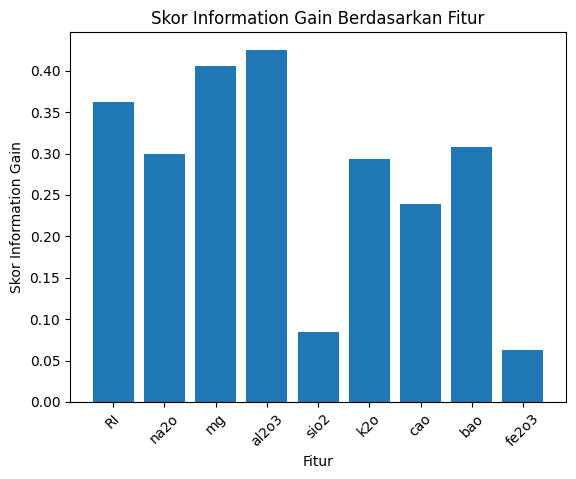

In [7]:
plt.bar(feature_names, feature_scores)
plt.xlabel('Fitur')
plt.ylabel('Skor Information Gain')
plt.title('Skor Information Gain Berdasarkan Fitur')
plt.xticks(rotation=45)
plt.show()


Dari data diatas, fitur yang memiliki pengaruh paling sedikit terhadap target adalah sio2, fe2o3. Pengaruh kedua fitur tersebut terhadap akurasi akan dibuktikan pada tahap modelling

### Identifikasi Outlier
Dalam identifikasi outlier, metode yang akan kita gunakan adalah dengan Interquartile range (IQR). Dalam metode IQR, melibatkan proses berikut
- hitung Q1 dan Q3
  - Q1 adalah kuartil pertama dari data
  - Q3 adalah kuartil ketiga dari data
- Hitung IQR
  
  Rumus dari IQR adalah  
$$
\text {IQR} = Q_3-Q_1
$$
- Hitung Batas Atas dan Bawah
  - Hitung batas atas dengan rumus
     
    $$
    \text {upper bound} = Q_3+1.5*IQR
    $$
    
  - Hitung batas bawah dengan rumus
    
    $$
    \text {lower bound} = Q_1-1.5*IQR
    $$
- Identifikasi Outlier
  
  Data yang memiliki nilai diliar batas bawah dan batas atas akan diidentifikasi sebagai outlier

In [8]:
# Hitung IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Tampilkan baris dengan outlier
outlier_rows = df[outliers]
print(outlier_rows)


          RI   na2o    mg  al2o3   sio2   k2o   cao   bao  fe2o3  label
5    1.51596  12.79  3.61   1.62  72.97  0.64  8.07  0.00   0.26      1
21   1.51966  14.77  3.75   0.29  72.02  0.03  9.00  0.00   0.00      1
32   1.51775  12.85  3.48   1.23  72.97  0.61  8.56  0.09   0.22      1
36   1.51909  13.89  3.53   1.32  71.81  0.51  8.78  0.11   0.00      1
38   1.52213  14.21  3.82   0.47  71.77  0.11  9.57  0.00   0.00      1
..       ...    ...   ...    ...    ...   ...   ...   ...    ...    ...
209  1.51623  14.14  0.00   2.88  72.61  0.08  9.18  1.06   0.00      7
210  1.51685  14.92  0.00   1.99  73.06  0.00  8.40  1.59   0.00      7
211  1.52065  14.36  0.00   2.02  73.42  0.00  8.44  1.64   0.00      7
212  1.51651  14.38  0.00   1.94  73.61  0.00  8.48  1.57   0.00      7
213  1.51711  14.23  0.00   2.08  73.36  0.00  8.62  1.67   0.00      7

[78 rows x 10 columns]


### Identifikasi Proporsi data Per Class
dalam identifikasi proporsi data, dapat digunakan fungsi 
```python
.value_counts()
```
yang terdapat pada library pandas

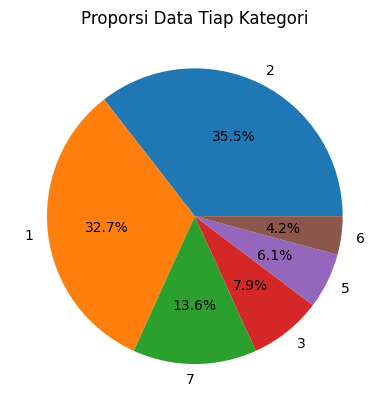

In [9]:
# Menghitung proporsi data tiap kategori
category_counts = df['label'].value_counts()

# Membuat diagram lingkaran
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proporsi Data Tiap Kategori')
plt.show()

In [10]:
category_counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: label, dtype: int64

Dari analisis diatas, dapat dilihat bahwa proporsi data kurang seimbang. Data di dominasi oleh kelas nomor 1, dan 2

**Kesimpulan**
1. Data tidak memiliki missing values
2. Data memiliki banyak outlier
3. Data memiliki proporsi yang tidak seimbang
4. Seluruh fitur memiliki pengaruh terhadap hasil
5. terdapat 1 data duplikat

## Data Preprocessing
### Menghilangkan Data Duplikat
Terdapat 1 data duplikat yang akan dihapus

In [11]:
# Menghapus data yang duplikat
df_clean_dup = df.drop_duplicates()

duplicate_rows = df_clean_dup.duplicated().sum()
print("Data Duplikat:")
print(duplicate_rows)


Data Duplikat:
0


### Balancing Data
Dalam tahap balancing data, Kita akan menggunakan teknik oversampling. Oversampling adalah suatu teknik dalam pengolahan data yang digunakan untuk menangani ketidakseimbangan dalam jumlah sampel antar kelas dalam dataset. Ketidakseimbangan kelas terjadi ketika satu atau beberapa kelas dalam dataset memiliki jumlah sampel yang jauh lebih sedikit daripada kelas-kelas lainnya. Situasi ini dapat mempengaruhi kinerja model pembelajaran mesin, terutama ketika model cenderung untuk memprediksi kelas mayoritas. Salah satu metode oversampling adalah SMOTE (Synthetic Minority Over-sampling Technique) Yaitu, mesin akan menghasilkan sampel sintetis baru untuk kelas minoritas dengan cara menggabungkan fitur dari beberapa sampel yang sudah ada. kita akan mencoba menggunakan library dari python yaitu imbalanced-learn dengan modul SMOTE



In [12]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from imblearn.over_sampling import SMOTE

# Inisialisasi RandomOverSampler
ros = SMOTE(random_state=42)

# Melakukan oversampling
x_resampled, y_resampled = ros.fit_resample(x, y)
data_merge = x_resampled.join(y_resampled)
data_merge.to_csv('glass_dataset_smote.csv')

Kemudian, kita akan melihat hasil dari balancing data

In [14]:
category_counts = y_resampled.value_counts()
category_counts

1    76
2    76
3    76
5    76
6    76
7    76
Name: label, dtype: int64

Setelah melalui teknik oversampling, maka kita mendapatkan proporsi data yang seimbang

### Normalisasi Data

#### Normalisasi Minmax
MinMax normalization adalah teknik normalisasi yang digunakan untuk mengubah nilai-nilai dalam suatu fitur ke dalam rentang tertentu, sering kali 0 hingga 1. dalam normalisasi minmax, melibatkan nilai tertinggin dan terendah dalam suatu fitur. Dijelaskan dengan rumus
$$X' = \frac{X-Xmin}{Xmax - Xmin}$$

Dimana :
- X adalah nilai asli dari suatu kolom/fitur
- min adalah nilai minimum dari suatu kolom/fitur dalam dataset
- max adalah nilai maximum dari suatu kolom/fitur dalam dataset
- X' adalah nilai X yang telah dinormalisasi.

dalam hal ini, kita akan menggunakan modul MinMaxScaler dari library scikit-learn

In [15]:
from sklearn.preprocessing import MinMaxScaler

Setelah import library nya, kita akan split dataset. Tujuan dadi split data adalah membagi data menjadi dua bagian, yaitu data training sebagai pelatihan data, dan data testing sebagai penguji kinerja model nantinya

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print("Banyaknya data latih : ", x_train.shape[0])
print("Banyaknya data uji   : ", x_test.shape[0])

# fitur.shape, fitur_train.shape, fitur_test.shape

Banyaknya data latih :  364
Banyaknya data uji   :  92


Kita akan melakukan inisialisasi scaler terlebih dahulu. 

In [17]:
import pickle
from pickle import dump
from pickle import load

minmax_scaler = MinMaxScaler()
minmax_x_train = minmax_scaler.fit_transform(x_train)
min_max_scaler ='min_max_scaler.pkl'


Kemudian, model dari minmax scaler akan disimpan dalam file pickle(.pkl), untuk nantinya akan dipanggil dalam proses modelling

In [18]:
# Menyimpan hasil normalisasi minmaxscaler ke dalam file pickle
with open(min_max_scaler, 'wb') as file:
    pickle.dump(minmax_scaler, file)
pickled_minmax_scaler = pickle.load(open('min_max_scaler.pkl','rb'))
pickled_minmax_scaler
minmax_x_test = pickled_minmax_scaler.transform(x_test)

## Klasifikasi dengan Random Forest




Random Forest adalah sebuah ensemble learning method yang terdiri dari sejumlah besar pohon keputusan. Setiap pohon keputusan, $T_i$, dibentuk secara acak dan independen. Prediksi dari Random Forest, $\hat{y}$, dihasilkan dari kombinasi prediksi dari setiap pohon keputusan:

\begin{equation}
\hat{y} = \frac{1}{N} \sum_{i=1}^{N} T_i(x)
\end{equation}

dengan $N$ sebagai jumlah pohon keputusan dalam ensemble. 

Pohon keputusan dibentuk dengan menggunakan subset acak dari data pelatihan, dan pada setiap node, pemilihan fitur juga dilakukan secara acak. Hal ini membantu dalam mengatasi overfitting dan meningkatkan generalisasi model.


Kita akan me- load model normalisasi yang telah disimpan tadi. Kemudian akan di transform ke dalam data train dan data testing

In [19]:
pickled_minmax_scaler = pickle.load(open('min_max_scaler.pkl','rb'))
pickled_minmax_scaler
minmax_x_test = pickled_minmax_scaler.transform(x_test)
minmax_x_train = pickled_minmax_scaler.fit_transform(x_train)

Kita akan menggunakan modul RandomForestClassifier dari library scikit-learn

In [20]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report
# Create and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(minmax_x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(minmax_x_test)

# Menghitung akurasi skor
accuracy = accuracy_score(y_test, y_pred)

# Print hasil akurasi
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


Dari modelling diatas, didapatkan skor akurasi yang cukup bagus, yaitu di 0,93

## Evaluasi

Dalam modelling yang telah kita lakukan dengan melakukan kombinasi

- Oversampling dengan SMOTE
- normalisasi dengan minmax
- klasifikasi dengan Random Forest, dengan  n_estimator = 100

Didapatkan hasil modelling dengan akurasi 0,93

Kemudian, kita akan melihat precision, recall, dan f1-score

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.93        92
weighted avg       0.94      0.93      0.93        92

